# Homework: Pybrain Iris

Here is the homework regarding the PyBrain library!

The goal is to build a neural network in PyBrain to classify the Iris dataset, so the code is very similar to the one we already have implemented

Hints:

Try to find how to declare more hidden layer using the buildNetwork shortcut

In order to create the SupervisedDataset object, you can implement a for loop to go through each instance of the dataset

As we have a classification problem with 3 classes (setosa, virginica and versicolor), you need to use the softmax function in the output layer

Also, you need to encode classes. For example: class 0 will be 1 0 0, class 1 will be 0 1 0, and finally, class 2 will be 0 0 1

The final output of the neural network will be an array with 3 values and you need to extract the highest probability.


![alt text](https://drive.google.com/uc?id=1xgZhek0467AtlfupqvovcjoFIJ2dB4in)

## Dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
inputs = iris.data
inputs

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
outputs = iris.target
outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Neural network

In [7]:
!pip install https://github.com/pybrain/pybrain/archive/0.3.3.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 1.5 MB 561 kB/s
  Created wheel for PyBrain: filename=PyBrain-0.3.1-py3-none-any.whl size=468230 sha256=f50d19b33297416a7625fc91be8371fa7c9d93acad6a36bccab8b2754d6891c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-rpwtj147/wheels/c7/56/4e/56d3dbbc48a90306f3ac2cc356de1d6d327090889fc0b29c6f
Successfully built PyBrain


In [9]:
import pybrain

In [10]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer, SigmoidLayer

In [11]:
(4 + 3) / 2

3.5

In [12]:
network = buildNetwork(4, 4, 4, 3, outclass = SoftmaxLayer, hiddenclass = SigmoidLayer, bias = False)

In [13]:
network['in']

<LinearLayer 'in'>

In [14]:
network['hidden0']

<SigmoidLayer 'hidden0'>

In [15]:
network['out']

<SoftmaxLayer 'out'>

In [16]:
dataset = SupervisedDataSet(4, 3)
for i in range(len(inputs)):
  if outputs[i] == 0:
    output = (1, 0, 0, )
  elif outputs[i] == 1:
    output = (0, 1, 0,)
  else:
    output = (0, 0, 1, )
  dataset.addSample((inputs[i][0], inputs[i][1], inputs[i][2], inputs[i][3]), output)

In [17]:
dataset['input'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
dataset['target']

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
optimizer = BackpropTrainer(module=network, dataset=dataset, learningrate=0.01)

In [20]:
epochs = 3000
error = []
for epoch in range(epochs):
  error_average = optimizer.train()
  if epoch % 500 == 0:
    print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(error_average))
    error.append(error_average)

Epoch: 1 Error: 0.13925598436090367
Epoch: 501 Error: 0.014775841419821635
Epoch: 1001 Error: 0.009373555448713275
Epoch: 1501 Error: 0.009888806125253537
Epoch: 2001 Error: 0.009246132386408756
Epoch: 2501 Error: 0.006502766763748326


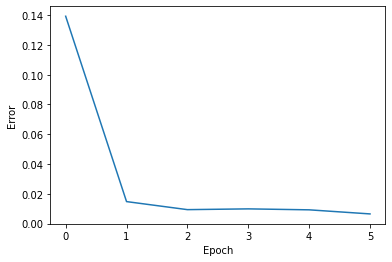

In [21]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(error)

In [22]:
network.params

array([  1.80831054,   0.26357212,   0.01257972,   0.29260993,
         3.65524871,  -1.24011713,  -3.33793363,  -2.61166994,
        -1.41660162,  -2.06162127,  -0.53018575,  -1.87719668,
         0.02982227,  -5.17194447,   2.17028165,   4.12394806,
         1.48304015,   0.88323195,  -1.85408425,  -2.10621169,
        -0.62018044,   0.2528076 ,   0.31603687,   8.2075085 ,
        -0.35449591,   1.41773515,  -2.34353283, -10.81758869,
        -9.93400398,  -3.18801926,   0.87714771,  10.476948  ,
         2.05718328,  -5.8241493 ,  11.18122202,  -4.09282382,
         2.64912724,   5.87052994,  -4.98927215,  -7.5246846 ,
        -1.33534772,  -0.42473545,  -5.75623985,  11.47905774])

In [23]:
inputs[0], outputs[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [24]:
network.activate(inputs[0])

array([9.98760417e-01, 1.23818773e-03, 1.39495666e-06])

In [26]:
import numpy as np
np.argmax(network.activate(inputs[0]))

0

**Conclusion: this classification was correct!** 